In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("D:/Elevate Lab/Task/project phase 2/HR_Attrition.csv")

df.info()
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       294 non-null    int64  
 1   BusinessTravel            294 non-null    int64  
 2   DailyRate                 294 non-null    int64  
 3   Department                294 non-null    int64  
 4   DistanceFromHome          294 non-null    int64  
 5   Education                 294 non-null    int64  
 6   EducationField            294 non-null    int64  
 7   EmployeeCount             294 non-null    int64  
 8   EmployeeNumber            294 non-null    int64  
 9   EnvironmentSatisfaction   294 non-null    int64  
 10  Gender                    294 non-null    int64  
 11  HourlyRate                294 non-null    int64  
 12  JobInvolvement            294 non-null    int64  
 13  JobLevel                  294 non-null    int64  
 14  JobRole   

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [4]:
df['Actual_Attrition'].value_counts()


Actual_Attrition
No     255
Yes     39
Name: count, dtype: int64

In [5]:
df['Predicted_Attrition'].value_counts()


Predicted_Attrition
Yes    160
No     134
Name: count, dtype: int64

In [6]:
df['Attrition_Probability'].describe()


count    294.000000
mean       0.503585
std        0.120518
min        0.168267
25%        0.423571
50%        0.514424
75%        0.589556
max        0.759718
Name: Attrition_Probability, dtype: float64

In [36]:
import os
os.makedirs("images", exist_ok=True)


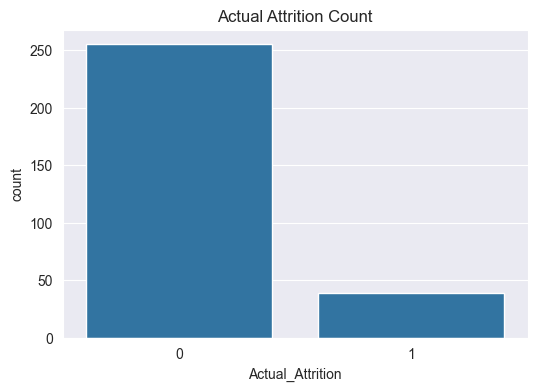

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Actual_Attrition', data=df)
plt.title("Actual Attrition Count")
plt.savefig("images/attrition_by_year.png",)
plt.show()


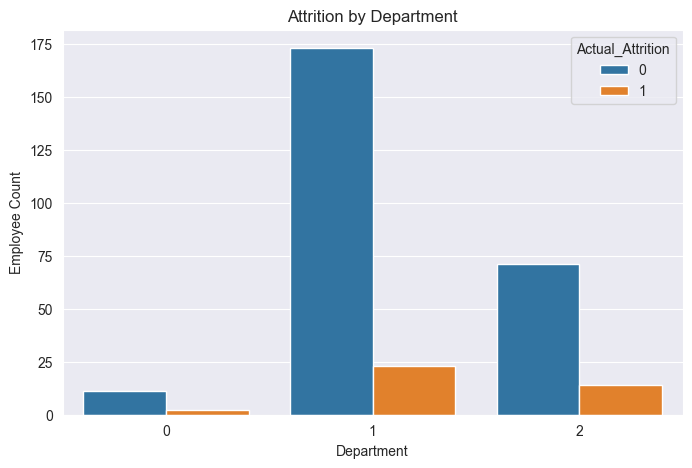

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(x='Department', hue='Actual_Attrition', data=df)
plt.title("Attrition by Department")
plt.xlabel("Department")
plt.ylabel("Employee Count")

plt.savefig("images/attrition_by_department.png",
            dpi=300,
            bbox_inches='tight')
plt.show()


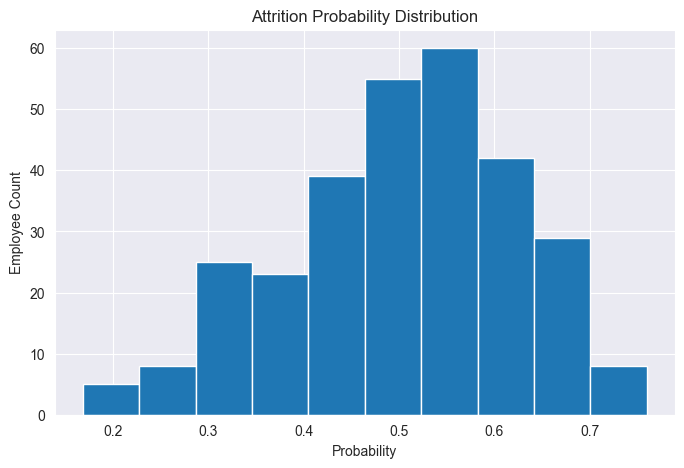

In [39]:
plt.figure(figsize=(8,5))
plt.hist(df['Attrition_Probability'], bins=10)
plt.title("Attrition Probability Distribution")
plt.xlabel("Probability")
plt.ylabel("Employee Count")
plt.savefig("images/attrition_probability.png",
             dpi=300,
            bbox_inches='tight')
plt.show()


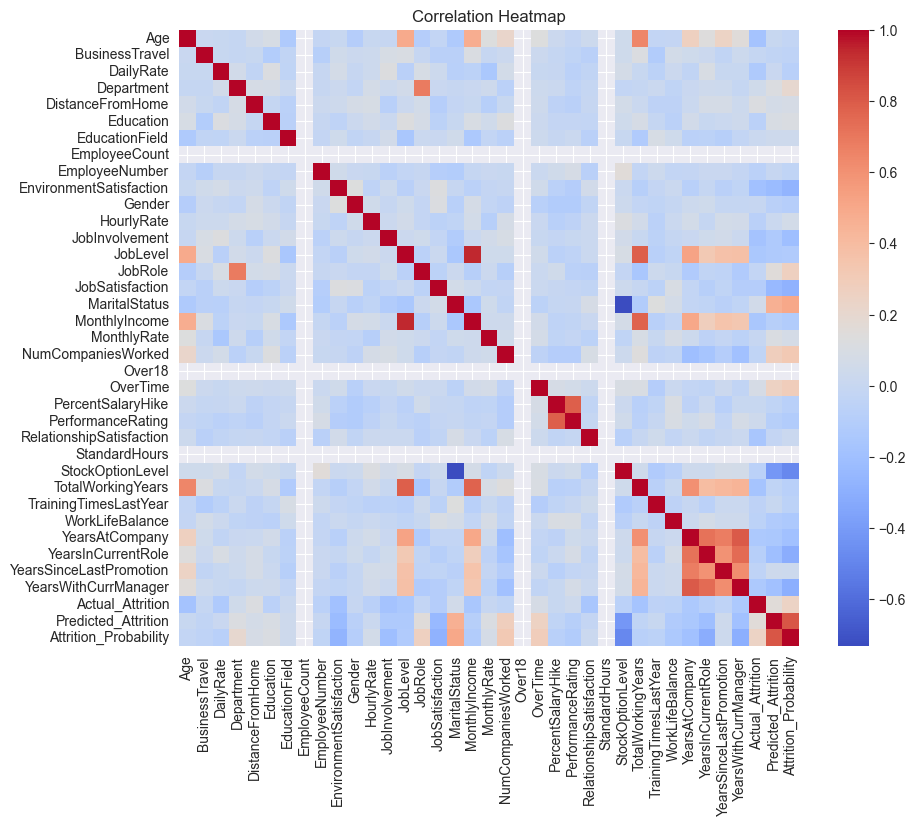

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("images/correlation_heatmap.png",
            dpi=300,
            bbox_inches='tight')
plt.show()


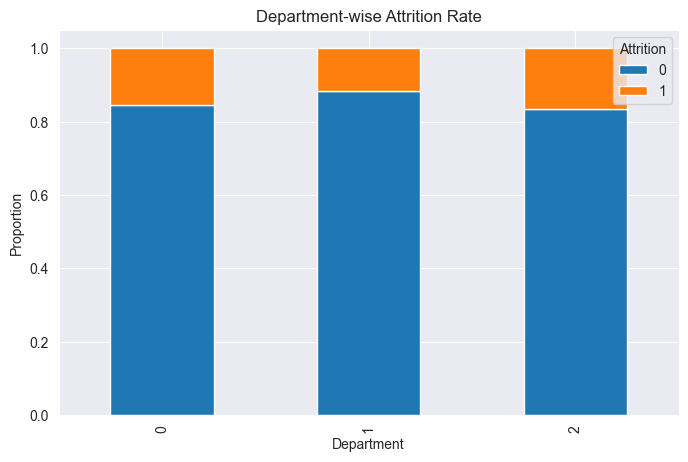

In [43]:
dept_attrition = (
    df.groupby('Department')['Actual_Attrition']
      .value_counts(normalize=True)
      .unstack()
)

dept_attrition.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Department-wise Attrition Rate")
plt.ylabel("Proportion")
plt.xlabel("Department")
plt.legend(title="Attrition")
plt.savefig("images/Department-wise Attrition Rate.png",
            dpi=300,
            bbox_inches='tight')
plt.show()


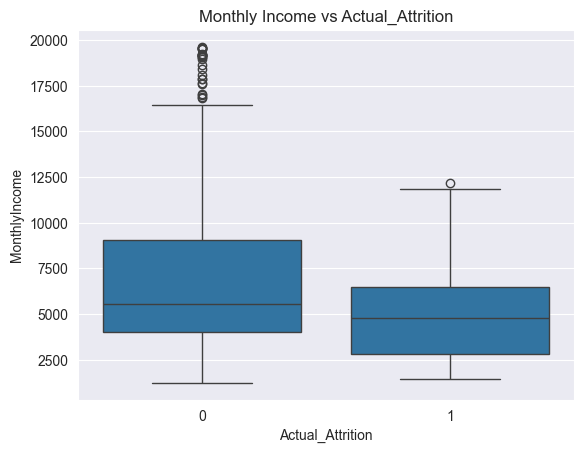

In [45]:
sns.boxplot(x='Actual_Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Actual_Attrition")
plt.savefig("images/monthly_income.png",
            dpi=300,
            bbox_inches='tight')
plt.show()


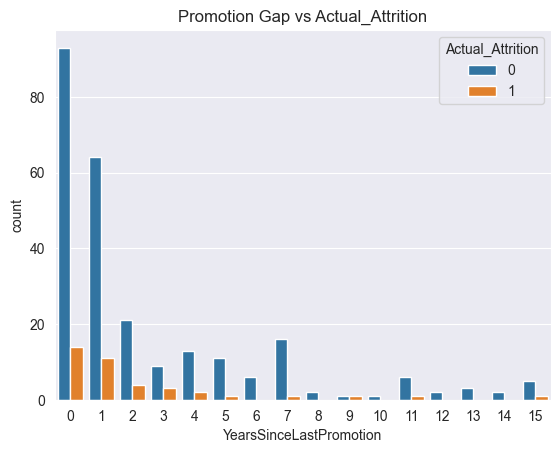

In [47]:
sns.countplot(x='YearsSinceLastPromotion', hue='Actual_Attrition', data=df)
plt.title("Promotion Gap vs Actual_Attrition")
plt.savefig("images/Promotion Gap vs Actual_Attrition.png",
            dpi=300,
            bbox_inches='tight')
plt.show()


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])


In [12]:
X = df.drop('Actual_Attrition', axis=1)
y = df['Actual_Attrition']


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [24]:
model = LogisticRegression(max_iter=2000, solver='lbfgs')
model.fit(X_train_scaled, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [25]:
y_pred = model.predict(X_test_scaled)


In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.864406779661017
[[49  3]
 [ 5  2]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        52
           1       0.40      0.29      0.33         7

    accuracy                           0.86        59
   macro avg       0.65      0.61      0.63        59
weighted avg       0.85      0.86      0.85        59



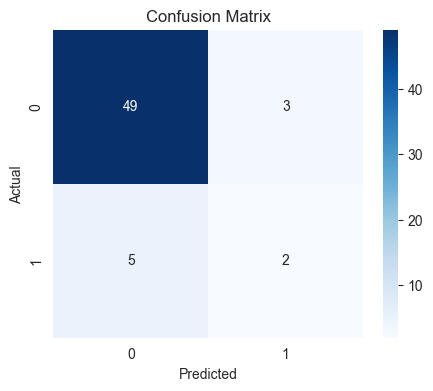

In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.savefig("images/confusion_matrix.png",
            dpi=300,
            bbox_inches='tight')
plt.show()


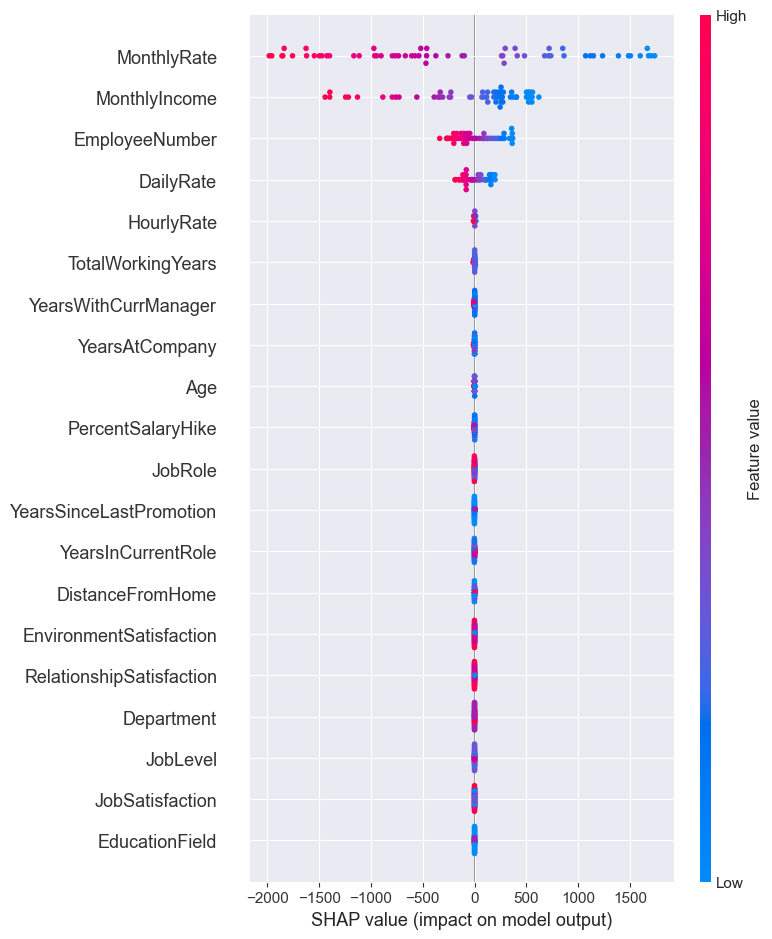

In [52]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)
plt.savefig("images/shap_summary_plot.png",
            dpi=300,
            bbox_inches='tight')
plt.close()


In [30]:
attrition_prob = model.predict_proba(X_test_scaled)[:, 1]

In [31]:
df_test = X_test.copy()

df_test['Actual_Attrition'] = y_test.values
df_test['Predicted_Attrition'] = y_pred
df_test['Attrition_Probability'] = attrition_prob


In [32]:
df_test['Actual_Attrition'] = df_test['Actual_Attrition'].map({1: 'Yes', 0: 'No'})
df_test['Predicted_Attrition'] = df_test['Predicted_Attrition'].map({1: 'Yes', 0: 'No'})


In [33]:
df_test.to_csv("HR_Attrition_Predictions.csv", index=False)


## 🔍 Key Insights – HR Attrition Analysis

### 1️⃣ Overall Attrition Trend
- Employee attrition is **not random**.
- Salary level, overtime, and career growth are the **strongest drivers** of resignation.
- A small group of features explains the **majority of attrition cases**.

### 2️⃣ Department & Workload
- Employees working **overtime** show a significantly higher attrition rate.
- Certain departments show **consistently higher risk** than others.

### 3️⃣ Model Interpretation
- SHAP analysis confirms that **OverTime, MonthlyIncome, and JobLevel**
   have the highest impact on attrition prediction.


